# Practical 5 Solution: Data Classification

Classification Problem: 
- Prediction of whether to give out the loan or not.

The required data file is:
1. **bank.csv** for builing a classification model
2. **bank_new_sample.csv** for testing a model with unseen data



# Part1: Data Pre-Processing

### 1. Reading data from ‘bank.csv’

In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [96]:
df = pd.read_csv('bank.csv')
df.head()

,customer_id,age,gender,marital,education,credit_card,balance,housing,loan
0,1,30.0,M,married,primary,no,1787.0,no,no
1,2,33.0,F,married,NaN,no,4789.0,yes,yes
2,3,35.0,M,single,tertiary,no,1350.0,yes,no
3,4,NaN,M,NaN,NaN,NaN,NaN,NaN,yes
4,5,59.0,F,married,secondary,no,0.0,yes,no


### 2. Basic Exploration

In [97]:
# Identification of data types:
df.dtypes

customer_id      int64
age            float64
gender          object
marital         object
education       object
credit_card     object
balance        float64
housing         object
loan            object
dtype: object

In [98]:
df.shape

(50, 9)

In [99]:
df.columns

Index(['customer_id', 'age', 'gender', 'marital', 'education', 'credit_card',
       'balance', 'housing', 'loan'],
      dtype='object')

In [100]:
df.nunique()

customer_id    50
age            30
gender          5
marital         4
education       4
credit_card     2
balance        40
housing         4
loan            2
dtype: int64

In [101]:
df['gender'].value_counts()

M     23
F     21
Fi     1
f      1
G      1
Name: gender, dtype: int64

### 3. Removing irrelevant/un-useful data

In [102]:
df = df.drop(columns=['customer_id'])
df.head()

,age,gender,marital,education,credit_card,balance,housing,loan
0,30.0,M,married,primary,no,1787.0,no,no
1,33.0,F,married,NaN,no,4789.0,yes,yes
2,35.0,M,single,tertiary,no,1350.0,yes,no
3,NaN,M,NaN,NaN,NaN,NaN,NaN,yes
4,59.0,F,married,secondary,no,0.0,yes,no


In [103]:
df.shape

(50, 8)

### 4. Handling duplications

In [104]:
# Count number of duplicated rows
len(df[df.duplicated()])

0

##### Note: No duplication

### 5. Finding outliers for categorical features and fix them (if needed)

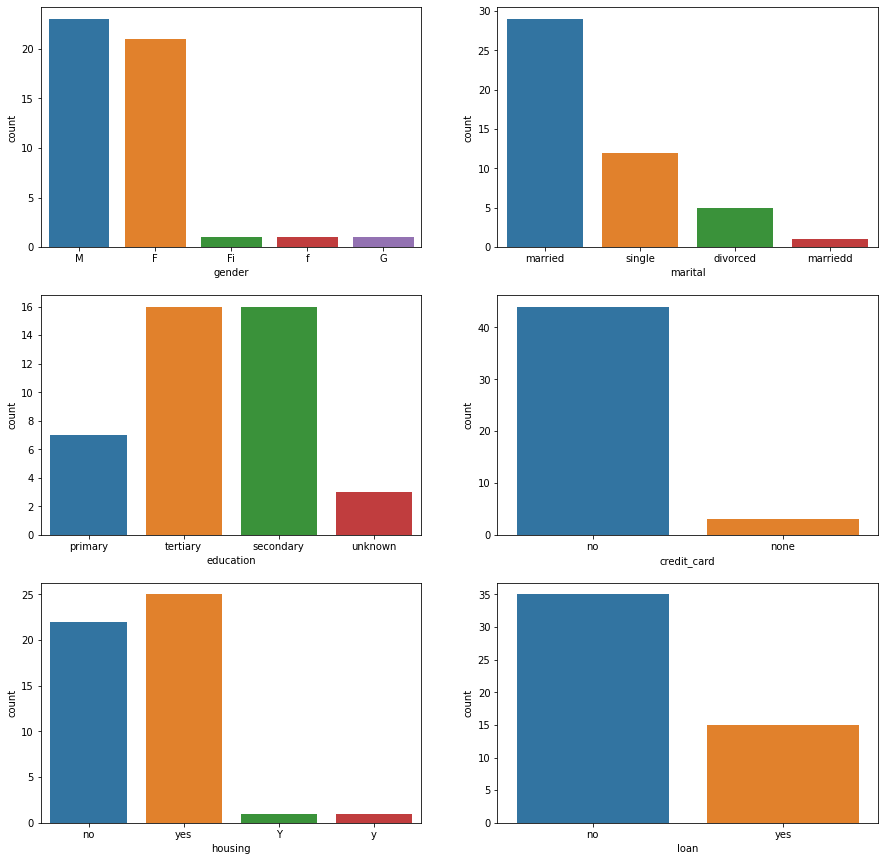

In [105]:
# Separate categorial features
cat_data = df.select_dtypes(include=['object']) 

# Create count plots for all nominal features
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
for i, subplot in zip(cat_data.columns, ax.flatten()):
    sns.countplot(x=cat_data[i], ax=subplot)

In [106]:
# Remove 'credit_card' 
df = df.drop(columns=['credit_card'])

In [107]:
# Fix value of gender
df.loc[df.gender =='Fi', 'gender'] = 'F'
df.loc[df.gender =='f', 'gender'] = 'F'
df.loc[df.gender =='G', 'gender'] = df.gender.mode()

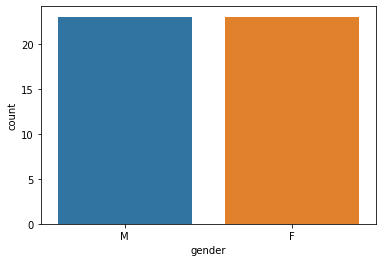

In [108]:
# check if the problem is fixed.
sns.countplot(x=df.gender)

In [109]:
# Fix value of marital status
df.loc[df.marital =='marriedd', 'marital'] = 'married'

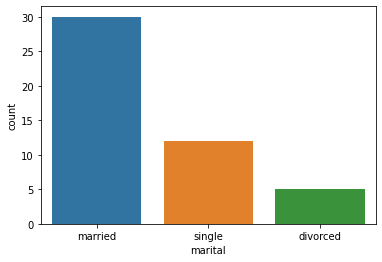

In [110]:
# check if the problem is fixed.
sns.countplot(x=df.marital)

In [111]:
# Fix value of housing
df.loc[df.housing =='Y', 'housing'] = 'yes'
df.loc[df.housing =='y', 'housing'] = 'yes'

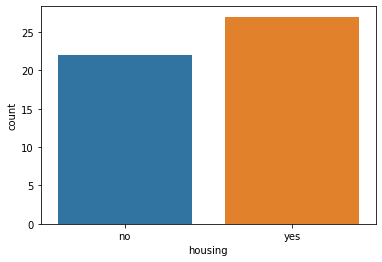

In [112]:
# check if the problem is fixed.
sns.countplot(x=df.housing)

### 6. Finding outliers for numeric features and fix them (if needed)

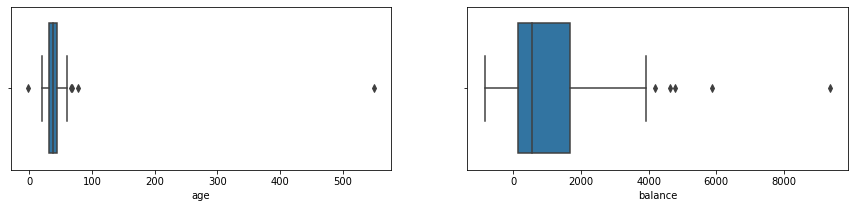

In [113]:
# Select only 2 numeric features 
num_data = df[['age','balance']]

# Create box plots for all numeric features
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
for i, subplot in zip(num_data.columns, ax.flatten()):
    sns.boxplot(x=num_data[i], ax=subplot)

In [114]:
# Fix age 
# Find the extream values
df[(df.age < 0)|(df.age > 100)]

,age,gender,marital,education,balance,housing,loan
26,-2.0,M,married,NaN,627.0,yes,no
46,550.0,NaN,married,primary,145.0,no,yes


In [115]:
# change extrame values to missig values (then handle them later)
df.loc[df.age<0, 'age']= np.NaN
df.loc[df.age>100, 'age']= np.NaN

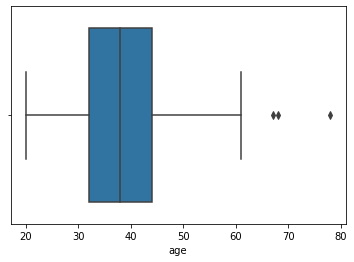

In [116]:
# check if the problem is fixed.
sns.boxplot(x=df.age)

### 7. Handling missing values (if any)

##### Check missing for each sample

In [117]:
# Check % missing for each row
df.isnull().sum(axis=1)/len(df.columns)*100

# Specify threshold (%) -->  We nomally allows only 30%-50% missing value for each row
threshold = 50 

# Samples with missing value
df.iloc[df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) > threshold]]

,age,gender,marital,education,balance,housing,loan
3,NaN,M,NaN,NaN,NaN,NaN,yes


In [118]:
# Dropping samples with % missing value higher than threshold
df = df.iloc[df.index[(df.isnull().sum(axis=1)/len(df.columns)*100) <= threshold]]

# Reset index
df.reset_index(drop=True, inplace=True)
df

,age,gender,marital,education,balance,housing,loan
0,30.0,M,married,primary,1787.0,no,no
1,33.0,F,married,NaN,4789.0,yes,yes
2,35.0,M,single,tertiary,1350.0,yes,no
3,59.0,F,married,secondary,0.0,yes,no
4,35.0,F,single,NaN,747.0,no,yes
5,36.0,M,married,tertiary,307.0,yes,no
6,39.0,F,married,secondary,NaN,yes,no
7,41.0,M,married,tertiary,221.0,yes,no
8,43.0,F,NaN,primary,-88.0,yes,yes
9,39.0,M,married,secondary,9374.0,yes,no


##### Check missing for each feature

In [119]:
# Count of null (missing) values in each feature
#df.isnull().sum()percentage of 

# Percentage of Missing value for each feature
df.isnull().sum()/len(df)*100

age           4.081633
gender        8.163265
marital       4.081633
education    14.285714
balance      14.285714
housing       0.000000
loan          0.000000
dtype: float64

In [120]:
# fill all missing numeric features with mean 
df[['age']]= df[['age']].fillna(df.age.mean()) 
df[['balance']]= df[['balance']].fillna(df.balance.mean()) 

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [121]:
# fill all missing categorical features with mode 
df[['gender']]= df[['gender']].fillna(df.gender.mode()[0]) 
df[['marital']]= df[['marital']].fillna(df.marital.mode()[0]) 
df[['education']]= df[['education']].fillna(df.education.mode()[0]) 

In [122]:
# Check again for NAN (missing) values in each feature
df.isnull().sum()/len(df)*100

age          0.0
gender       0.0
marital      0.0
education    0.0
balance      0.0
housing      0.0
loan         0.0
dtype: float64

##### Check out the cleaned dataset

In [123]:
# Check the shape of the cleaned dataset
df.shape

(49, 7)

In [124]:
# Check data
df

,age,gender,marital,education,balance,housing,loan
0,30.000000,M,married,primary,1787.00000,no,no
1,33.000000,F,married,secondary,4789.00000,yes,yes
2,35.000000,M,single,tertiary,1350.00000,yes,no
3,59.000000,F,married,secondary,0.00000,yes,no
4,35.000000,F,single,secondary,747.00000,no,yes
5,36.000000,M,married,tertiary,307.00000,yes,no
6,39.000000,F,married,secondary,1309.47619,yes,no
7,41.000000,M,married,tertiary,221.00000,yes,no
8,43.000000,F,married,primary,-88.00000,yes,yes
9,39.000000,M,married,secondary,9374.00000,yes,no


### 8. Handling mixed-type data

In [125]:
# List all column names
df.columns

Index(['age', 'gender', 'marital', 'education', 'balance', 'housing', 'loan'], dtype='object')

In [126]:
#### Seperate features by data types
# get all nominal / ordinal / Boolean features
nominal_data = df[['gender', 'marital', 'housing']]
ordinal_data = df[['education']]

# get all numberic features
num_data = df[['age','balance']]

# get class for classification problem
class_target = df[['loan']]

In [127]:
# check unique values of 'education' feature
ordinal_data.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [128]:
# transform 'education' feature
ordered_education={'unknown':0,'primary':1,'secondary':2,'tertiary':3}

education=ordinal_data.education.apply(ordered_education.get)
education.head()

0    1
1    2
2    3
3    2
4    2
Name: education, dtype: int64

In [129]:
# perform one-hot encoding for nominal features
nominal_data = pd.get_dummies(nominal_data)
nominal_data.head()

,gender_F,gender_M,marital_divorced,marital_married,marital_single,housing_no,housing_yes
0,0,1,0,1,0,1,0
1,1,0,0,1,0,0,1
2,0,1,0,0,1,0,1
3,1,0,0,1,0,0,1
4,1,0,0,0,1,1,0


In [130]:
# combine all transformed data from 3 dataframes
transform_num_data = pd.concat([num_data, education, nominal_data,], axis=1)
transform_num_data.head()

,age,balance,education,gender_F,gender_M,marital_divorced,marital_married,marital_single,housing_no,housing_yes
0,30.0,1787.0,1,0,1,0,1,0,1,0
1,33.0,4789.0,2,1,0,0,1,0,0,1
2,35.0,1350.0,3,0,1,0,0,1,0,1
3,59.0,0.0,2,1,0,0,1,0,0,1
4,35.0,747.0,2,1,0,0,0,1,1,0


In [131]:
# Normalization (Rescaling features into a range of [0,1])
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
norm_data = mms.fit_transform(transform_num_data)
norm_data = pd.DataFrame(norm_data, columns=transform_num_data.columns) 
norm_data.head()

,age,balance,education,gender_F,gender_M,marital_divorced,marital_married,marital_single,housing_no,housing_yes
0,0.172414,0.257850,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.224138,0.551502,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.258621,0.215103,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.672414,0.083048,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.258621,0.156119,0.666667,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [132]:
#Combine normalized features with class target
norm_data = pd.concat([norm_data,class_target], axis=1)
norm_data.head()

,age,balance,education,gender_F,gender_M,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan
0,0.172414,0.257850,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,0.0,no
1,0.224138,0.551502,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0,yes
2,0.258621,0.215103,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,no
3,0.672414,0.083048,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0,no
4,0.258621,0.156119,0.666667,1.0,0.0,0.0,0.0,1.0,1.0,0.0,yes


In [133]:
#Save pre-processed data for later use
norm_data.to_csv('pre-processed_bank.csv', index=False)

### The END of Data Pre-Processing^^

-------

# Part 2: Data Classification

## Building and Evaluating K-Nearest Neighbors (KNN) Models

### 1. Defining Features (X) and Class (Y)

In [134]:
df = norm_data #or read in from file df = pd.read_csv('pre-processed_bank.csv')
df.head()

,age,balance,education,gender_F,gender_M,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan
0,0.172414,0.257850,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,0.0,no
1,0.224138,0.551502,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0,yes
2,0.258621,0.215103,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0,no
3,0.672414,0.083048,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0,no
4,0.258621,0.156119,0.666667,1.0,0.0,0.0,0.0,1.0,1.0,0.0,yes


In [135]:
df.columns

Index(['age', 'balance', 'education', 'gender_F', 'gender_M',
       'marital_divorced', 'marital_married', 'marital_single', 'housing_no',
       'housing_yes', 'loan'],
      dtype='object')

In [136]:
# Defining data features using column positions 
X = df.iloc[:,0:10] #select column 0-9

In [137]:
X.head()

,age,balance,education,gender_F,gender_M,marital_divorced,marital_married,marital_single,housing_no,housing_yes
0,0.172414,0.257850,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.224138,0.551502,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.258621,0.215103,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.672414,0.083048,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.258621,0.156119,0.666667,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [138]:
# Defining class using column position (the last column)
Y = df.iloc[:,-1]  # -1 is for the last column

In [139]:
Y.head()

0     no
1    yes
2     no
3     no
4    yes
Name: loan, dtype: object

### 2. Model Evaluation

#### 2.1 Train and Test on the Entire Dataset
1. Build the KNN model with k=2 on the entire dataset.
2. Report "Training Accuracy".

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the whole dataset
knn.fit(X, Y)

# Predict classes of training set
y_pred = knn.predict(X)

# Evaluate model performace
ac = metrics.accuracy_score(Y, y_pred)
print('Training Accuracy: ', ac)
print('Training Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(Y, y_pred))

Training Accuracy:  0.7959183673469388
Training Classification Error:  0.20408163265306123
Confusion matrix:
[[35  0]
 [10  4]]


#### 2.2 Stratified Training-Test Splitting
Train on training set - Test on test set.
1. Stratified split the dataset into the training and test sets: training (70%), test (30%).
2. Build the KNN model with k=2 on the training set. 
3. Report "Testing Accuracy".

In [141]:
# Import module from sklean to split data onto training and test sets
from sklearn.model_selection import train_test_split

# Split training set and test set with ration 70% : 30% by specify test_size = 0.3
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, stratify = Y)

# print the shape of trainning and test sets
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (34, 10)
y_train shape:  (34,)
x_test shape:  (15, 10)
y_test shape:  (15,)


In [142]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the knn model with k = 2
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean')

# Fit the model to the training set
knn.fit(x_train, y_train)

# Predict classes of the test set
y_pred = knn.predict(x_test)

# Evaluate model performace
ac = metrics.accuracy_score(y_test, y_pred)
print('Tesing Accuracy: ', ac)
print('Tesing Classification Error: ', 1-ac)
print('Confusion matrix:')
print(metrics.confusion_matrix(y_test, y_pred))

Tesing Accuracy:  0.8
Tesing Classification Error:  0.19999999999999996
Confusion matrix:
[[11  0]
 [ 3  1]]


#### 2.3 Stratified k-fold Cross Validation
Using cross_validation module to implement stratified k-fold cross-validation.
1. Build the KNN model with k=2.
2. Evaluate with 10-fold cross validaiton.
3. Report "10-fold Cross Validation Accuracy".

In [143]:
#Step 1: Import the sklearn classes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k=1 
knn = KNeighborsClassifier(n_neighbors=2, metric = 'euclidean') 

#Step 3: Fit and test the model with cross validation (10-fold)
cv_results = cross_validate(knn, X,Y, cv=10, return_train_score=True)
cv_results

{'fit_time': array([0.00377798, 0.00317359, 0.00165677, 0.00150347, 0.00154757,
        0.00210214, 0.00181651, 0.00240541, 0.00166821, 0.0015111 ]),
 'score_time': array([0.00326824, 0.00191975, 0.00162172, 0.0016048 , 0.00154233,
        0.00236416, 0.00184441, 0.00185251, 0.00159883, 0.0015111 ]),
 'test_score': array([0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.6 , 0.6 , 0.6 , 0.8 , 0.75]),
 'train_score': array([0.75      , 0.81818182, 0.81818182, 0.79545455, 0.79545455,
        0.81818182, 0.79545455, 0.77272727, 0.79545455, 0.8       ])}

In [144]:
# Accuracy score for each fold 
print('Tesing Accuracy for each fold:', cv_results['test_score'])

# Overall accuracy score for cross validaiton 
print('Cross Validation Accuracy: %.3f +/- %.3f' % (cv_results['test_score'].mean(), cv_results['test_score'].std()))

Tesing Accuracy for each fold: [0.8  0.8  0.8  0.8  0.8  0.6  0.6  0.6  0.8  0.75]
Cross Validation Accuracy: 0.735 +/- 0.090


### 3. KNN: Choosing an optimal k value
Using 10-fold cross validation can help to pick a good k value for KNN Create a for loop that trains various KNN models on the whole dataset with different k values, then keep track of the accuracy for each of these models with a list.
1. Use 10-fold cross validation
2. Use k range from 1 to 10

In [145]:
# Experimenting with different k values
from sklearn import metrics
k_range = list(range(1,11)) # a list of k from 1-10
scores_cv = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv_results = cross_validate(knn, X,Y, cv=10) # compute CV accuracy
    scores_cv.append(cv_results['test_score'].mean())
    #print(k, cv_results['test_score'].mean())

scores_cv = np.round(scores_cv,5)
scores_cv

array([0.595, 0.735, 0.615, 0.695, 0.695, 0.715, 0.735, 0.715, 0.715,
       0.615])

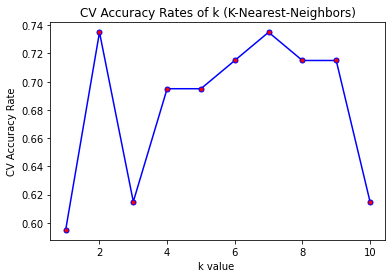

In [146]:
# create a line graph for testing accuracy
import matplotlib.pyplot as plt
plt.plot(k_range, scores_cv, 'y', color='blue',marker='o', markerfacecolor='red', markersize='5')
plt.xlabel('k value ')
plt.ylabel('CV Accuracy Rate')
plt.title('CV Accuracy Rates of k (K-Nearest-Neighbors)')
plt.show()

In [147]:
# find best k with the highest cv accuracy
import operator
index, value = max(enumerate(scores_cv), key=operator.itemgetter(1))
best_k = index+1
print('best k =',best_k , ', accuracy =', value)

best k = 2 , accuracy = 0.735


### 5. KNN: Model Creation
Creating KNN model from the entrie data set, with the best k found in the previous step.

In [148]:
#Step 1: Import the sklearn class
from sklearn.neighbors import KNeighborsClassifier

#Step 2: Create the model object with paramenters
#Create an instance of KNeighborsClassifier with k = best_k 
best_knn = KNeighborsClassifier(n_neighbors=best_k, metric = 'euclidean') 

#Step 3: Fit the model with data (model training)
#Model is learning the relationship between data (X) and class(Y)
best_knn.fit(X,Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

### 6. KNN: Deploying the model
Use the created model to predict class label(s) for new data instance(s)
What are the predicted class labels of the new bank customers (bank_new_sample.csv) using the best classification model?

#### 6.1 Data Pre-processing for new data instances
Is data in "bank_new_sample.csv" ready for prediction? If not, fix it first.

In [149]:
# Reading new data instance
X_new = pd.read_csv('bank_new_sample.csv') 
X_new

,customer_id,age,gender,marital,education,balance,housing
0,100,32,M,married,primary,1700,no
1,101,41,F,single,tertiary,5880,no
2,102,68,M,divorced,secondary,4200,no
3,103,61,M,married,unknown,4600,yes


In [150]:
# Data that was used to build the model
X.head()

,age,balance,education,gender_F,gender_M,marital_divorced,marital_married,marital_single,housing_no,housing_yes
0,0.172414,0.257850,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.224138,0.551502,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.258621,0.215103,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.672414,0.083048,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.258621,0.156119,0.666667,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [151]:
# transform 'education' feature
ordered_education={'unknown':0,'primary':1,'secondary':2,'tertiary':3}

education=X_new.education.apply(ordered_education.get)
education.head()

0    1
1    3
2    2
3    0
Name: education, dtype: int64

In [152]:
# One-hot encoding for nominal features
nominal_data = X_new[['gender','marital','housing']]
nominal_data = pd.get_dummies(nominal_data)
nominal_data

,gender_F,gender_M,marital_divorced,marital_married,marital_single,housing_no,housing_yes
0,0,1,0,1,0,1,0
1,1,0,0,0,1,1,0
2,0,1,1,0,0,1,0
3,0,1,0,1,0,0,1


In [153]:
# Check the new data
X_new.head()

,customer_id,age,gender,marital,education,balance,housing
0,100,32,M,married,primary,1700,no
1,101,41,F,single,tertiary,5880,no
2,102,68,M,divorced,secondary,4200,no
3,103,61,M,married,unknown,4600,yes


In [154]:
# Select only used features
X_new = X_new[['age', 'balance']]
X_new.head()

,age,balance
0,32,1700
1,41,5880
2,68,4200
3,61,4600


In [155]:
# Data that was used to build the model
X.head()

,age,balance,education,gender_F,gender_M,marital_divorced,marital_married,marital_single,housing_no,housing_yes
0,0.172414,0.257850,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.224138,0.551502,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.258621,0.215103,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.672414,0.083048,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.258621,0.156119,0.666667,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [156]:
# Combine all transformed features together
X_new = pd.concat([X_new, education, nominal_data], axis=1)
X_new

,age,balance,education,gender_F,gender_M,marital_divorced,marital_married,marital_single,housing_no,housing_yes
0,32,1700,1,0,1,0,1,0,1,0
1,41,5880,3,1,0,0,0,1,1,0
2,68,4200,2,0,1,1,0,0,1,0
3,61,4600,0,0,1,0,1,0,0,1


In [157]:
# Data that was used to build the model
X.head()

,age,balance,education,gender_F,gender_M,marital_divorced,marital_married,marital_single,housing_no,housing_yes
0,0.172414,0.257850,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.224138,0.551502,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.258621,0.215103,1.000000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.672414,0.083048,0.666667,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.258621,0.156119,0.666667,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [158]:
#Normalize them using the normalization model created previously (mms)
X_new = mms.transform(X_new)
X_new

array([[0.20689655, 0.24933972, 0.33333333, 0.        , 1.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ],
       [0.36206897, 0.65822166, 1.        , 1.        , 0.        ,
        0.        , 0.        , 1.        , 1.        , 0.        ],
       [0.82758621, 0.49388633, 0.66666667, 0.        , 1.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ],
       [0.70689655, 0.53301379, 0.        , 0.        , 1.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ]])

#### 6.2 Predict class labels of the new data
What are the predicted class labels of the new data using the best classification model?

In [159]:
predicted_class = best_knn.predict(X_new)
print("predicted_class =", predicted_class)

predicted_class = ['no' 'no' 'no' 'no']


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# The END^^